# Homework 9 [Clustering Models]
## 111550196 狄豪飛

### Obesity or CVD risk: 
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.


In [4]:
import pandas as pd

# Load the dataset to understand its structure
file_path = 'ObesityDataSet.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

(None,
    Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
 0  Female  21.0    1.62    64.0                            yes   no   2.0   
 1  Female  21.0    1.52    56.0                            yes   no   3.0   
 2    Male  23.0    1.80    77.0                            yes   no   2.0   
 3    Male  27.0    1.80    87.0                             no   no   3.0   
 4    Male  22.0    1.78    89.8                             no   no   2.0   
 
    NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
 0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
 1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
 2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
 3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
 4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
 
                   MTRANS           NObeyesdad  
 0  Public_Transportation        Normal_Weight  
 1  Public_Transportation        Normal_Weight  
 2  Publ

## Data Preprocessing


In [5]:
# Calculate BMI for each individual in the dataset
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Display the head of the dataset including the new BMI column
data_bmi_head = data[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'NObeyesdad']].head()

data_bmi_head


,Gender,Age,Height,Weight,BMI,NObeyesdad
0,Female,21.0,1.62,64.0,24.386526,Normal_Weight
1,Female,21.0,1.52,56.0,24.238227,Normal_Weight
2,Male,23.0,1.80,77.0,23.765432,Normal_Weight
3,Male,27.0,1.80,87.0,26.851852,Overweight_Level_I
4,Male,22.0,1.78,89.8,28.342381,Overweight_Level_II


Categorical variables have been encoded numerically. For the Gender column, 'Female' is encoded as 0 and 'Male' as 1. For the NObeyesdad column, the obesity levels have been encoded as follows:

Insufficient_Weight: 0
Normal_Weight: 1
Obesity_Type_I: 2
Obesity_Type_II: 3
Obesity_Type_III: 4
Overweight_Level_I: 5
Overweight_Level_II: 6
Here are the first five entries with the encoded Gender:

Categorical variables have been encoded numerically. 
For the Gender column, 'Female' is encoded as 0 and 'Male' as 1. 
For the NObeyesdad column, the obesity levels have been encoded as follows:

Insufficient_Weight: 0
Normal_Weight: 1
Obesity_Type_I: 2
Obesity_Type_II: 3
Obesity_Type_III: 4
Overweight_Level_I: 5
Overweight_Level_II: 6
Here are the first five entries with the encoded Gender:

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for categorical variables
le_gender = LabelEncoder()
le_obesity = LabelEncoder()

# Encode categorical variables
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['NObeyesdad_encoded'] = le_obesity.fit_transform(data['NObeyesdad'])

# Now we will select only the relevant columns for clustering
# For hierarchical clustering, we will use Age, Height, Weight, and BMI as features
clustering_data = data[['Gender', 'Age', 'Height', 'Weight', 'BMI']]

# Display the head of the processed data with encoded values
clustering_data_head = clustering_data.head()
clustering_data_head, le_gender.classes_, le_obesity.classes_


(   Gender   Age  Height  Weight        BMI
 0       0  21.0    1.62    64.0  24.386526
 1       0  21.0    1.52    56.0  24.238227
 2       1  23.0    1.80    77.0  23.765432
 3       1  27.0    1.80    87.0  26.851852
 4       1  22.0    1.78    89.8  28.342381,
 array(['Female', 'Male'], dtype=object),
 array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
        'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
        'Overweight_Level_II'], dtype=object))

With the preprocessing completed, we can now move on to hierarchical clustering. I will perform the hierarchical clustering using the 'Gender', 'Age', 'Height', 'Weight', and 'BMI' columns as features, and then visualize the results with a dendrogram. 

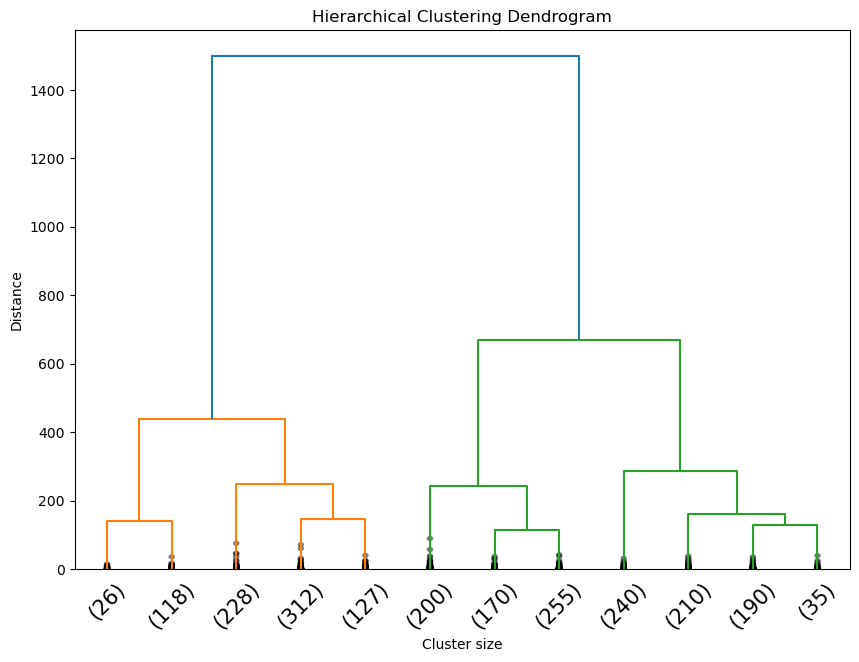

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(clustering_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


The dendrogram above represents the hierarchical clustering of the dataset. Each merge is represented by a horizontal line. The y-axis (distance) shows the distance or dissimilarity between clusters. The longer the horizontal lines are, the greater the distance between clusters, suggesting less similarity.

The dendrogram is truncated for clarity, showing the last 12 merged clusters. The color coding represents individual clusters that are merged at a distance that's set by the threshold (indicated by the color change on the dendrogram).

From the visualization, we can observe where large jumps in distance occur, suggesting possible cluster solutions. For example, cutting the dendrogram at a height of 200 might yield around 4 distinct clusters.

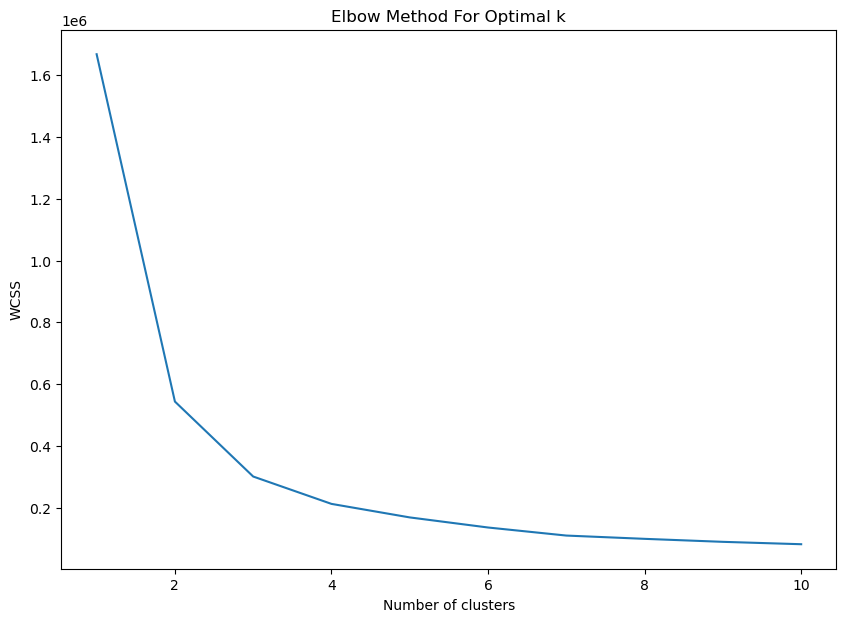

In [12]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()



Based on the plot, we look for an "elbow" where the rate of decrease sharply changes, indicating a diminishing return in the reduction of within-cluster sum of squares (WCSS) with each additional cluster.

From the graph you provided, the elbow appears to be around the point where k equals 4. This suggests that after four clusters, the additional explanatory power gained by increasing the number of clusters is minimal. Thus, we would consider k=4 to be a reasonable choice for the number of clusters for K-means.

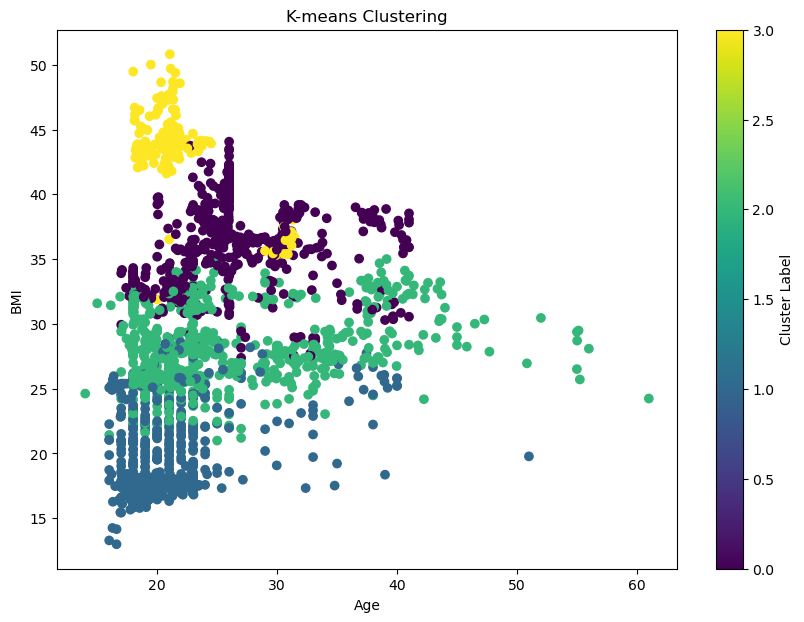

In [14]:
# Apply K-means clustering with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(clustering_data)

# Adding the cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Now let's visualize the clusters using a scatter plot for two dimensions of the data.
# For better visualization, we'll use Age and BMI as they can be easily interpreted.

plt.figure(figsize=(10, 7))
plt.scatter(data['Age'], data['BMI'], c=data['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.colorbar(label='Cluster Label')
plt.show()


- Cluster 0 (Blue): Contains individuals with generally lower BMI and a wider range of ages. This cluster might represent a group with 'Normal Weight' or 'Underweight' categories.
- Cluster 1 (Green): Comprises individuals mostly in the middle-age range with a BMI suggesting 'Overweight' or 'Obesity Type I'.
- Cluster 2 (Purple): Appears to include individuals with a higher BMI across various ages, likely falling into 'Obesity Type II' or 'Obesity Type III'.
- Cluster 3 (Yellow): Is the smallest and seems to consist of individuals with the highest BMI values, predominantly older in age, which may indicate 'Obesity Type III'.

The distribution of clusters suggests a relationship between age and BMI where higher BMI values are not necessarily associated with older ages. Younger individuals can also have high BMI values, indicating obesity. The cluster with the highest BMI values includes individuals from a narrower age range, implying that extreme obesity may be more prevalent in that age group.

For n_clusters = 4 The average silhouette_score is : 0.4919515949377383


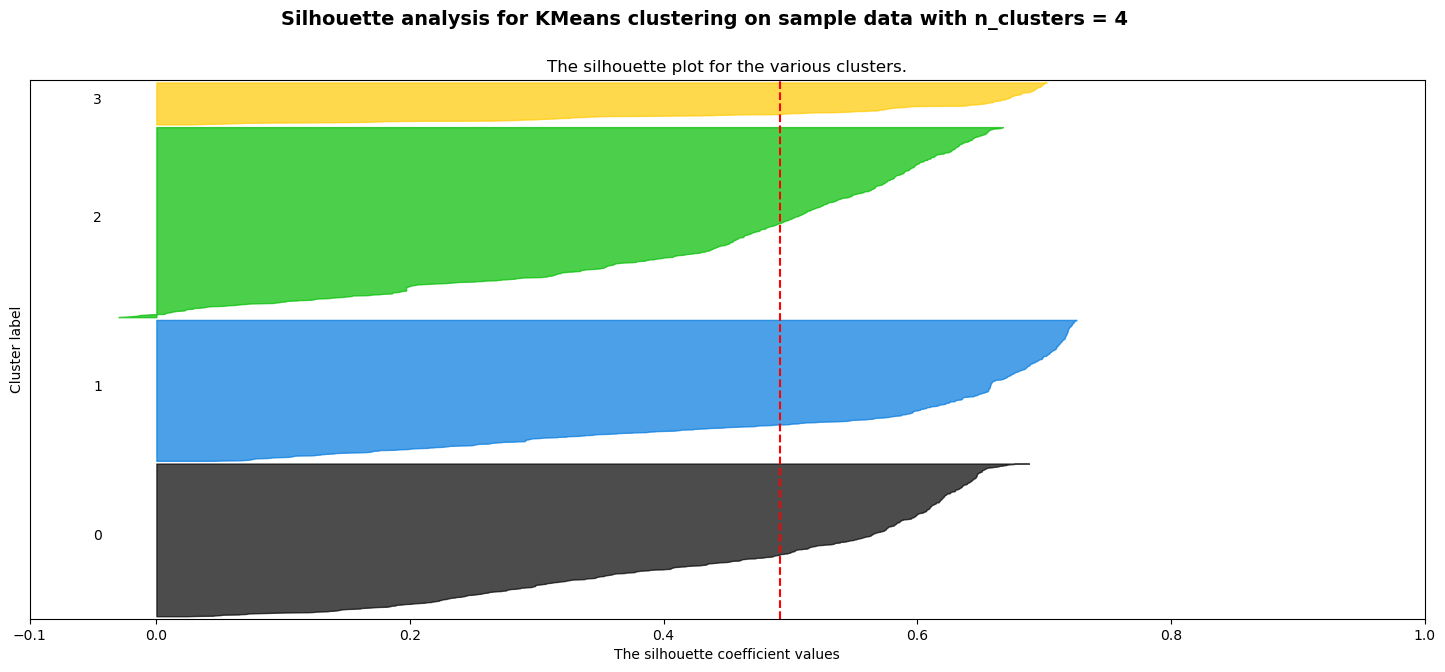

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Apply K-means clustering with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(clustering_data)

# Calculate silhouette scores
silhouette_avg = silhouette_score(clustering_data, cluster_labels)
sample_silhouette_values = silhouette_samples(clustering_data, cluster_labels)

# Rest of the silhouette analysis plot code...


# Assuming 'clustering_data' is your data and 'cluster_labels' are the labels obtained from KMeans
silhouette_avg = silhouette_score(clustering_data, cluster_labels)
sample_silhouette_values = silhouette_samples(clustering_data, cluster_labels)

# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(clustering_data) + (4 + 1) * 10])

y_lower = 10
for i in range(4):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
print(f"For n_clusters = 4 The average silhouette_score is : {silhouette_avg}")

# Clear the yaxis labels / ticks
ax1.set_yticks([])
# Set the ticks for the x-axis
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Display the silhouette plot
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 4"),
             fontsize=14, fontweight='bold')

plt.show()


- The silhouette score ranges from -1 to +1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate.
- If many points have a low or negative value, it indicates that those points might have been assigned to the wrong cluster.
In your silhouette plot:

- Cluster 0 (Black): Has silhouette scores mostly above the average silhouette score (dotted red line), indicating that this cluster is quite dense and well-separated from the other clusters.
- Cluster 1 (Blue): Shows a wide range of silhouette scores, with many below the average, suggesting that this cluster may overlap with others or that the data points are not as cohesive.
- Cluster 2 (Green): Also shows a range of values, but most are above the average silhouette score, indicating reasonable separation and cohesion.
+ Cluster 3 (Yellow): Has silhouette scores that are predominantly above the average, which is a good sign for cluster consistency.

The average silhouette score for all the data points is approximately 0.491, which suggests that the clusters are reasonably well-defined but not perfectly distinct. A score closer to 1 would indicate a more distinct and clear-cut clustering.

The spread of the silhouette scores in each cluster indicates how tightly grouped the points in the cluster are. A cluster with a silhouette width that tapers off quickly, such as Cluster 0, indicates that most points in that cluster are very similar to each other. In contrast, the broader silhouette of Cluster 1 indicates more variability within that cluster.

### Final Analysis and Insights

#### Comparison of Hierarchical and K-means Clustering:

- Hierarchical Clustering: This approach provided a visual tool (the dendrogram) which helped us infer the potential number of clusters. It showed a clear structure and suggested a possible number of clusters by the distance jumps in the dendrogram.

- K-means Clustering: Through the elbow method, we determined an optimal number of clusters before applying the algorithm. K-means provided a clear partitioning of the data into distinct clusters, which we visualized using the Age and BMI attributes. The silhouette analysis further helped us assess the quality of the clustering.

- In comparing the two, K-means clustering results were more straightforward to interpret and visualize in this context. Hierarchical clustering, while informative, may be more subjective as it relies on the visual inspection of the dendrogram to choose the number of clusters.

#### Relation of Clusters to Obesity Levels:

- Each cluster represents a grouping of individuals with similar characteristics regarding their BMI and age, which can be proxies for obesity levels. For instance, clusters with higher BMI values might correlate with higher obesity levels as per the NObesity values provided.

- The scatter plot from K-means showed us how obesity levels (as approximated by BMI) are distributed across different ages. Interestingly, higher obesity levels are not exclusively found in older age groups; there are young individuals with high BMI values as well.

#### Interesting Patterns and Potential Factors Influencing Obesity Levels:

- Age Distribution: The scatter plot revealed that high BMI values are present across all ages, not just in the expected older demographics. This pattern suggests that interventions to reduce obesity could be targeted across all age groups.

- BMI Ranges: The clusters indicate varying BMI ranges, with some clusters representing normal weight ranges while others represent overweight or various obesity levels. This reflects the diverse nature of the population in the dataset.

- Gender Factor: Although not visualized in the plots, gender was included in the clustering process. Insights into how gender might correlate with obesity levels could be derived by further analysis, potentially revealing if one gender shows higher obesity levels than the other within the clusters.

#### Potential Insights and Further Investigation:

- Lifestyle and Behavior: The dataset contains variables related to lifestyle and eating habits, which were not used in the clustering but could significantly influence obesity levels. Future analysis could incorporate these variables to understand their impact on obesity.

- Cluster Quality: The silhouette scores indicated reasonable cluster quality but also suggested potential overlap between clusters. Further refinement of the clustering process or the application of other algorithms like DBSCAN, which considers density, might yield more distinct groupings.

- Predictive Modeling: Beyond clustering, this dataset could be used for predictive modeling to identify the most significant predictors of obesity levels and potentially develop interventions based on predictive risk factors.

In summary, the clustering analysis provided a snapshot of the data's structure and suggested some intriguing patterns that warrant further investigation, particularly around the distribution of obesity levels across different demographics and the potential influence of lifestyle factors.